In [1]:
import folium
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

# Ports

In [2]:
# Load the ports data from ports.csv
ports = pd.read_csv("ports.csv")

# Create a map centered at the average latitude and longitude of the ports
map_center = [ports["Position_Latitude"].mean(), ports["Position_Longitude"].mean()]
port_map = folium.Map(location=map_center, zoom_start=2)

# Add markers for each port
for _, port in ports.iterrows():
    folium.Marker(
        location=[port["Position_Latitude"], port["Position_Longitude"]],
        popup=f"Port: {port['Port_Name']}",
    ).add_to(port_map)

# Display the map
port_map

# Trade Frequencies

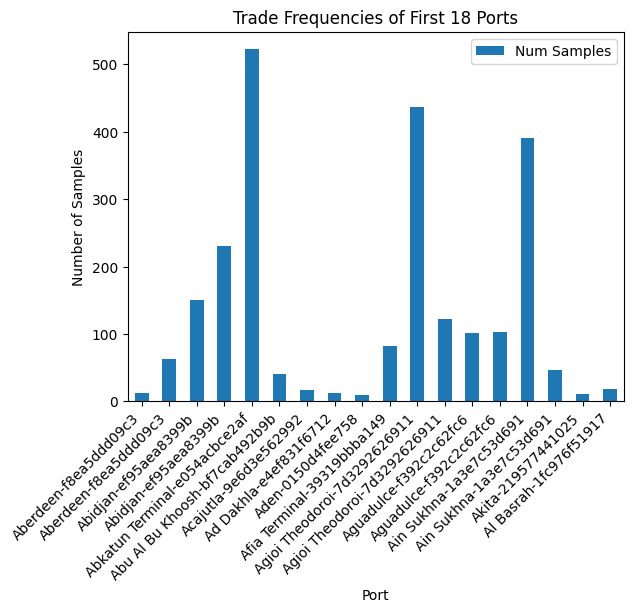

In [3]:
# Load the port trade frequencies data
port_trade_frequencies = pd.read_csv("port_trade_frequency_distribution.csv")

# Plot a bar chart of the first 18 rows
port_trade_frequencies.head(18).plot(
    x='Port', 
    y='Num Samples', 
    kind='bar', 
    title='Trade Frequencies of First 18 Ports'
)
plt.xlabel('Port')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.show()

In [4]:
# Create a map centered at the average latitude and longitude of the ports
trade_map = folium.Map(location=map_center, zoom_start=2)

# Add circle markers for each port with 'Supply' trade frequency
for _, port in port_trade_frequencies.iterrows():
    supplyDemand = port['SupplyDemand']
    port_info = ports[ports['Port_Name'] == port['Port']]
    if not port_info.empty:
        folium.CircleMarker(
            location=[port_info.iloc[0]['Position_Latitude'], port_info.iloc[0]['Position_Longitude']],
            radius=5 + port['Num Samples'] / 100,  # Scale the radius based on trade frequency
            color='green' if supplyDemand == 'Supply' else 'red',
            opacity=0.3,
            fill=True,
            fill_color='green' if supplyDemand == 'Supply' else 'red',
            fill_opacity=0.3,
            popup=f"Port: {port['Port']}<br>{supplyDemand} Frequency: {port['Num Samples']}"
        ).add_to(trade_map)

# Display the map
trade_map

# Cargo Weights

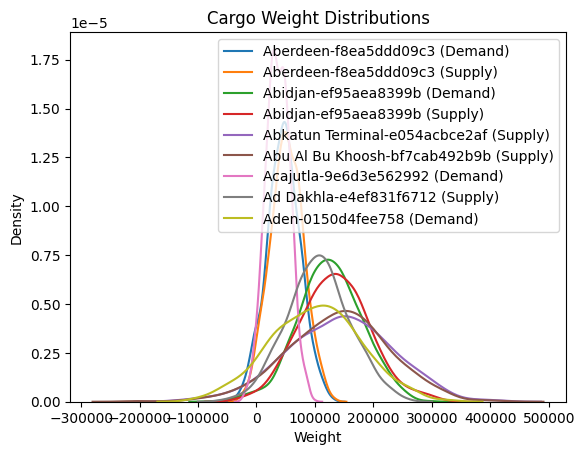

In [5]:
# Load the port cargo weight distribution data
port_cargo_weight_distribution = pd.read_csv("port_cargo_weight_distribution.csv")

# Plot the distributions of the first 9 rows
for i in range(9):
    row = port_cargo_weight_distribution.iloc[i]
    sns.kdeplot(
        x=np.random.normal(row["Mean"], row["Std. Dev"], 1000),
        label=f"{row['Port']} ({row['SupplyDemand']})"
    )

plt.title("Cargo Weight Distributions")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.legend()
plt.show()

In [6]:
# Create a map centered at the average latitude and longitude of the ports
mean_map = folium.Map(location=map_center, zoom_start=2)

# Add circle markers for each port with mean cargo weight
for _, row in port_cargo_weight_distribution.iterrows():
    supplyDemand = row['SupplyDemand']
    port_info = ports[ports['Port_Name'] == row['Port']]
    if not port_info.empty:
        folium.CircleMarker(
            location=[port_info.iloc[0]['Position_Latitude'], port_info.iloc[0]['Position_Longitude']],
            radius=5 + row['Mean'] / 10000,  # Scale the radius based on the mean value
            color='cyan' if supplyDemand == 'Supply' else 'magenta',
            opacity=0.3,
            fill=True,
            fill_color='cyan' if supplyDemand == 'Supply' else 'magenta',
            fill_opacity=0.3,
            popup=f"Port: {row['Port']}<br> {supplyDemand} Mean Cargo Weight: {row['Mean']}"
        ).add_to(mean_map)

# Display the map
mean_map

# The Rest

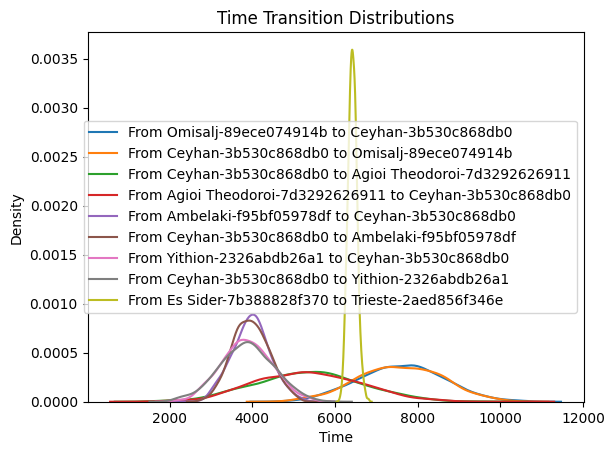

In [7]:
# Load the time transition distribution data
time_transition_distribution = pd.read_csv("time_transition_distribution.csv")

# Filter rows with non-zero standard deviation
filtered_data = time_transition_distribution[time_transition_distribution["Std. Dev"] > 0]

# Plot the distributions of the first 9 rows
for i in range(9):
    row = filtered_data.iloc[i]
    sns.kdeplot(
        x=np.random.normal(row["Mean"], row["Std. Dev"], 1000),
        label=f"From {row['From']} to {row['To']}"
    )

plt.title("Time Transition Distributions")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()
plt.show()

In [8]:
# Load the routing graph object from the pickle file
with open("routing_graph_world_mask.pkl", "rb") as file:
    routing_graph = pickle.load(file)
nx_graph = nx.Graph(routing_graph)

In [9]:
# Print the number of nodes and edges in the graph
print(f"Number of nodes in the graph: {nx_graph.number_of_nodes()}")
print(f"Number of edges in the graph: {nx_graph.number_of_edges()}")

# Print the first few nodes and edges in the graph
print("First 5 nodes in the graph:", list(nx_graph.nodes)[:5])
print("First 5 edges in the graph:", list(nx_graph.edges)[:5])

Number of nodes in the graph: 249701
Number of edges in the graph: 978513
First 5 nodes in the graph: [(-180.0, 90.0), (-180.0, 89.5833), (-179.5833, 90.0), (-179.5833, 89.5833), (179.5833, 90.0)]
First 5 edges in the graph: [((-180.0, 90.0), (-180.0, 89.5833)), ((-180.0, 90.0), (-179.5833, 90.0)), ((-180.0, 90.0), (-179.5833, 89.5833)), ((-180.0, 90.0), (179.5833, 90.0)), ((-180.0, 89.5833), (-179.5833, 90.0))]


In [10]:
# Load the precomputed routes object from the pickle file
with open("precomputed_routes.pickle", "rb") as file:
    precomputed_routes = pickle.load(file)

In [11]:
print(f"Number of precomputed routes: {len(precomputed_routes)}")
print("First 5 precomputed routes:", list(precomputed_routes.items())[:5])

Number of precomputed routes: 272691
First 5 precomputed routes: [('Aberdeen-f8ea5ddd09c3Abidjan-ef95aea8399b', [Route<name: , length: 4028.64, #stops: 8>]), ('Aberdeen-f8ea5ddd09c3Abkatun Terminal-e054acbce2af', [Route<name: , length: 4825.21, #stops: 8>]), ('Aberdeen-f8ea5ddd09c3Abu Al Bu Khoosh-bf7cab492b9b', [Route<name: , length: 6565.34, #stops: 17>, Route<name: , length: 11660.49, #stops: 15>]), ('Aberdeen-f8ea5ddd09c3Agioi Theodoroi-7d3292626911', [Route<name: , length: 3112.62, #stops: 9>]), ('Aberdeen-f8ea5ddd09c3Aguadulce-f392c2c62fc6', [Route<name: , length: 4810.17, #stops: 7>, Route<name: , length: 9236.51, #stops: 13>])]
